In [21]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

# Print first 10 file names as a sample 
count = 0
max_files = 10  # Set the maximum number of files to print

for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        if count < max_files:
            print(os.path.join(dirname, filename))
            count += 1
        else:
            break

/kaggle/input/chestxraydataset/chest_xray/test/PNEUMONIA/person1676_virus_2892.jpeg
/kaggle/input/chestxraydataset/chest_xray/test/PNEUMONIA/person1650_virus_2852.jpeg
/kaggle/input/chestxraydataset/chest_xray/test/PNEUMONIA/person22_virus_55.jpeg
/kaggle/input/chestxraydataset/chest_xray/test/PNEUMONIA/person122_bacteria_582.jpeg
/kaggle/input/chestxraydataset/chest_xray/test/PNEUMONIA/person85_bacteria_417.jpeg
/kaggle/input/chestxraydataset/chest_xray/test/PNEUMONIA/person79_virus_148.jpeg
/kaggle/input/chestxraydataset/chest_xray/test/PNEUMONIA/person29_virus_64.jpeg
/kaggle/input/chestxraydataset/chest_xray/test/PNEUMONIA/person123_bacteria_587.jpeg
/kaggle/input/chestxraydataset/chest_xray/test/PNEUMONIA/person75_virus_136.jpeg
/kaggle/input/chestxraydataset/chest_xray/test/PNEUMONIA/person153_bacteria_725.jpeg


In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout , BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from keras.callbacks import ReduceLROnPlateau
import cv2
import os

In [36]:
data_path = '/kaggle/input/chestxraydataset/chest_xray/train'

In [25]:
import random
train_data = []
val_data = []

for folder in os.listdir(data_path):
    folder_path = os.path.join(data_path, folder)
    file = os.listdir(folder_path)
    num_train = int(0.8 * len(file))
    files_train = random.sample(file, num_train)
    files_val = list(set(file) - set(files_train))
    
    for file in files_train:
        file_path = os.path.join(folder_path, file)
        img = cv2.imread(file_path)
        img = cv2.resize(img, (224,224))
        train_data.append((img, folder))
        
    for file in files_val:
        file_path = os.path.join(folder_path, file)
        img = cv2.imread(file_path)
        img = cv2.resize(img, (224,224))
        val_data.append((img, folder))

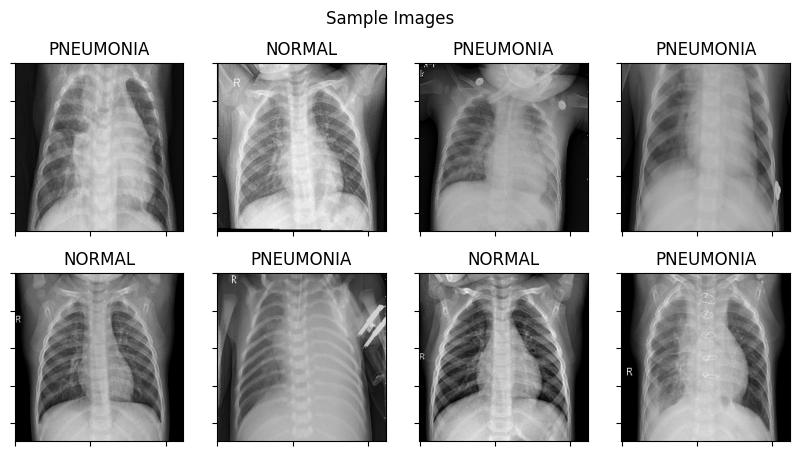

In [33]:
fig, axes = plt.subplots(2, 4, figsize=(10, 5))
plt.suptitle('Sample Images')

for (img, label), ax in zip(random.sample(train_data, 8), axes.flatten()):
    ax.xaxis.set_ticklabels([])
    ax.yaxis.set_ticklabels([])
    ax.grid(False)
    ax.set_title(label)
    ax.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB) )

plt.show()

In [47]:
import pandas as pd
from PIL import Image
import os

data_path = '/kaggle/input/chestxraydataset/chest_xray/train'

# List to store image statistics
widths = []
heights = []
mean_intensities = []

# Iterate over each image in the directory
for folder in os.listdir(data_path):
    folder_path = os.path.join(data_path, folder)
    if os.path.isdir(folder_path):
        for filename in os.listdir(folder_path):
            img_path = os.path.join(folder_path, filename)
            with Image.open(img_path) as img:
                # Get image size
                width, height = img.size
                widths.append(width)
                heights.append(height)
                # Calculate mean intensity
                mean_intensity = float(img.convert('L').resize((1, 1)).getpixel((0, 0)))
                mean_intensities.append(mean_intensity)

# Create a DataFrame to store the image statistics
image_statistics = pd.DataFrame({
    'width': widths,
    'height': heights,
    'mean_intensity': mean_intensities
})

# Display image statistics
print("Image Statistics:")
print(image_statistics.describe())

Image Statistics:
             width       height  mean_intensity
count  5216.000000  5216.000000     5216.000000
mean   1320.610813   968.074770      128.718175
std     355.298743   378.855691       18.562324
min     384.000000   127.000000       62.000000
25%    1056.000000   688.000000      118.000000
50%    1284.000000   888.000000      129.000000
75%    1552.000000  1187.750000      140.000000
max    2916.000000  2663.000000      222.000000


Based on the image statistics provided, several preprocessing and analysis suggestions can be made:

- Standardize Image Sizes: Since the images have a wide range of sizes, it might be beneficial to resize them to a consistent size (e.g., 512x512 pixels) to ensure uniformity across the dataset. This can help in reducing computational complexity and improving model performance.

- Normalize Pixel Intensities: Normalize the pixel values to a standard range (e.g., [0, 1] or [-1, 1]) to reduce the impact of intensity variations across images. This can help in improving the model's ability to learn from the data.

- Enhance Contrast: Adjust the contrast of the images based on their mean intensity values to improve feature visibility, especially in images with lower mean intensities. This can help in enhancing the quality of the images for better analysis.

- Noise Reduction: Apply noise reduction techniques such as Gaussian blur or median filtering to improve image quality and reduce the impact of outliers in pixel intensities. This can help in improving the overall quality of the images.

- Feature Extraction: Consider extracting meaningful features from the images, such as texture features or shape descriptors, to capture important characteristics for further analysis or classification tasks.

- Data Augmentation: Augment the dataset by applying transformations such as rotation, flipping, and scaling to increase the diversity of the dataset and improve the model's ability to generalize.

- Model Selection: Based on the characteristics of the dataset, consider using deep learning models such as convolutional neural networks (CNNs), which are well-suited for image classification tasks and can automatically learn relevant features from the images.

By implementing these preprocessing and analysis suggestions, it is possible to enhance the quality of the dataset and improve the performance of machine learning models trained on the data.